#### Imports

In [1]:
import time

from tsp_util.PathSpecification import PathSpecification
from tsp_util.Maze import Maze

from aco.ACOConvergence import ACOConvergence
from aco.AntColonyOptimization import AntColonyOptimization
from aco.IntelligentAnt import IntelligentAnt

from viz_util.Visualizer import Visualizer

#### ACO Modifications


1. Dynamic Alpha

    Problem Tackled: Premature convergence caused by an over-reliance on pheromones in the early stages leading to suboptimal solutions.
    Solution: Start with a lower alpha value, allowing more exploration at the beginning. Gradually increase alpha over iterations, focusing ants on exploiting the best-found paths later in the search process.

2. Alpha and Beta Sampling

    Problem Tackled: Lack of diversity in exploration strategies can lead to stagnation.
    Solution: Instead of all ants having the same alpha and beta values (which influences how much they focus on pheromone trails vs. heuristic factors), we sample alpha and beta values from a normal distribution.

3. Parameterized Elitism

    Problem Tackled: Fine-tuning the balance between preserving good solutions and promoting diverse exploration. Helps in finding tricky but faster routes 
    Solution: Introduce a parameter to control the number of "elite ants". The pheromone trails of these top-performing ants are given extra weight when updating pheromone levels after each iteration.

4. Ant Memory

    Problem Tackled: Ants wasting time revisiting areas and getting trapped in dead ends.
    Solution: Give each ant a simple memory to keep track of recently visited locations and avoid revisting them. In dead ends, use memory to backtrack efficiently.

### Example Usage

In [3]:
# Change maze difficulty here. ['toy', 'easy', 'medium', 'hard', 'insane']
MAZE_DIFFICULTY = 'hard'

"""
Params for initializing AntColonyOptimization
Convergence is a custom class that handles convergence, if thresh=None the corresponding check is ignored

ants_per_gen -> nr of ants per generation
generations -> nr of generations to run for
q -> param controlling pheremone update strength. q * 1/length
evaporation -> evaperation percentage per generation.
elitism -> elitism multiplier. Elite ants leave q * elitism pheremones
n_elite -> Number of ants to apply elitism to. Picks top n ants
alpha -> Controlls strength of pheremones for probability calculation. Used as mean for sampling.
beta -> Controlls strength of heuristic for probability calculation. Used as mean for sampling
alpha_increase -> Percentage to increase alpha by each generation. Can be set to decrease alpha.
alpha_beta_dev -> Standard deviation to use for alpha/beta sampling
ant_class -> ant class to initialize (f.x StandardAnt, IntelligentAnt)
convergence -> custom class to handle convergence.
    - max_iter : max iterations (ant.find_route()s) before stopping
    - stagnation threshold : max pheremone updates without imporovement before stopping
    - quality threshold: stops once quality => quality threshold
    - consistency threshold: stops once max difference in last pheremones and current ones less than threshold
"""
ACO_PARAMS = {
    'ants_per_gen':32,
    'generations':1024,
    'q':512,
    'evaporation':0.1,
    'elitism':2,
    'n_elite':4,
    'alpha':1,
    'beta':1,
    'alpha_increase':0.01,
    'alpha_beta_dev':4,
    'ant_class': IntelligentAnt,
    'convergence':ACOConvergence(
        max_iter=None, stagnation_threshold=64,
        quality_threshold=None, consistency_threshold=None
    )
}

# Construct the optimization objects
maze = Maze.create_maze(f"./../data/{MAZE_DIFFICULTY}_maze.txt")
spec = PathSpecification.read_coordinates(f"./../data/{MAZE_DIFFICULTY}_coordinates.txt")
aco = AntColonyOptimization(maze=maze, **ACO_PARAMS)

# Run with multiprocessing
start_time_normal = int(round(time.time() * 1000))
shortest_route_normal = aco.find_shortest_route_multiproc(path_specification=spec)
print("find_shortest_route()")
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time_normal) / 1000.0))
print("Route size: " + str(shortest_route_normal.size()) + "\titerations: " + str(aco.iterations) + '\n')

Ready reading maze file ./../data/hard_maze.txt
stagnation convergence!
find_shortest_route()
Time taken: 404.181
Route size: 879	iterations: 2048



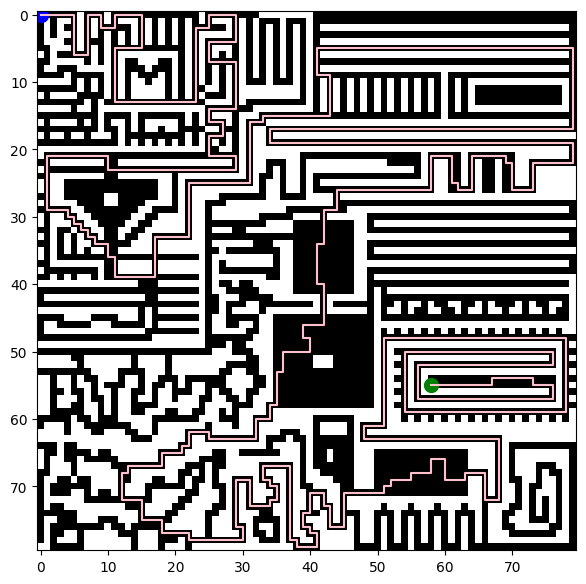

In [4]:
Visualizer.visualize_individual_path(maze, shortest_route_normal, spec)